# Problem 3

### prepare dataset II

(200, 2)
(200,)


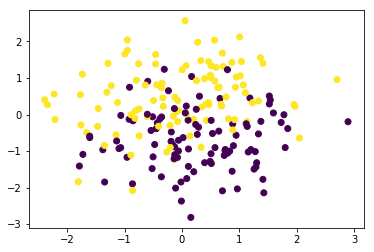

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=32)
n = 200
omega = np.random.randn(1)
noise = 0.8* np.random.randn(n)
X = np.random.randn(n, 2)
y = ((omega * X[:, 0] + X[:, 1] + noise) > 0)
y = 2 * y - 1
datasetii = {'data': X, 'target': y}
print(X.shape)
print(y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y)

## 3.1

In [8]:
import numpy as np

np.diag([1,2,3,4])
np.clip?

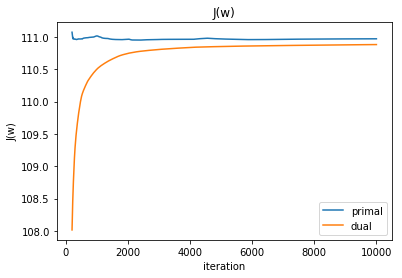

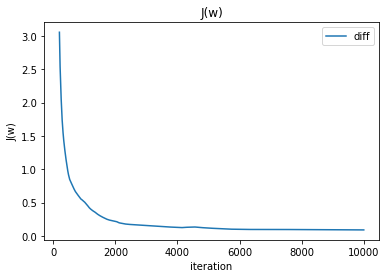

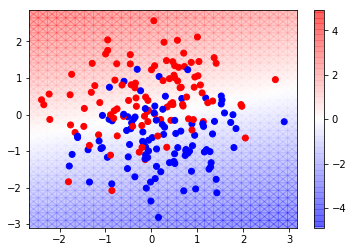

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class SVM:
    def __init__(self, X, y, lam=1):
        """
        input
            X: array (#item, #feature)
            y: list (#item)
        """
        self.X = X
        self.Y = np.diag(y)
        self.K = (self.X.T @ self.Y).T @ (self.X.T @ self.Y)
        self.lam = lam
        self.w = np.ones(self.X.shape[1])
        self.a = np.ones(self.X.shape[0])


    def primal_function(self):
        "主問題の目的関数"
        loss = np.clip(1 - (self.w.T@self.X.T@self.Y), 0, None)
        return np.sum(loss) + self.lam * self.w@self.w

    def dual_Lagrange_function(self):
        "双対問題の目的関数"
        return - 1/(4 * self.lam) * self.a.T@self.K@self.a + np.sum(self.a)

    def update_w_from_a(self):
        self.w = 1/(2 * self.lam) * self.X.T@self.Y@self.a

    def projected_gradient_descent(self, eps=1e-6, max_itr=10000, eta=lambda t:1/(1+t)):
        n, d = self.X.shape
        pre = - np.inf
        dual_log = []
        primal_log = []
        for itr in range(max_itr):
            now = self.dual_Lagrange_function()
            dual_log.append((itr, now))
            primal_log.append((itr, self.primal_function()))
            if(abs(now-pre) < eps):
                print(f"iteration stop at {itr}")
                break
            else:
                pre = now
            alpha = self.a - eta(itr) * ( 1/(2*self.lam) * (self.K@self.a) - np.ones(n))
            self.a = np.clip(alpha, 0, 1)
            self.update_w_from_a()
        return np.array(primal_log), np.array(dual_log)
    
    def predict(self, X):
        y = 2*(self.w.T@X.T > 0)-1
        return y
    
    def predict_val(self, X):
        return self.w.T@X.T

X = datasetii['data']
y = datasetii['target']
svm = SVM(X, y, lam=1)
primal_log, dual_log = svm.projected_gradient_descent()

fr = 200
to = -1
plt.title("J(w)")
plt.xlabel("iteration")
plt.ylabel("J(w)")
plt.plot(primal_log[fr:to, 0], primal_log[fr:to, 1], label="primal")
plt.plot(dual_log[fr:to, 0], dual_log[fr:to, 1], label="dual")
plt.legend()
plt.savefig('./tmp/hoge.png')
plt.show()

diff = primal_log[fr:to, 1] - dual_log[fr:to, 1]
plt.title("J(w)")
plt.xlabel("iteration")
plt.ylabel("J(w)")
plt.plot(primal_log[fr:to, 0], diff, label="diff")
plt.legend()
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0, cmap=ListedColormap(('red', 'blue')))
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xs = np.linspace(xlim[0], xlim[1], 30)
ys = np.linspace(ylim[0], ylim[1], 30)
Ys, Xs = np.meshgrid(ys, xs)
xys = np.vstack([Xs.ravel(), Ys.ravel()]).T
l = svm.predict_val(xys).reshape(Xs.shape)
plt.pcolormesh(Xs, Ys, svm.predict_val(xys).reshape(Xs.shape), alpha=0.4, shading='gouraud', cmap='bwr', vmin=-np.max(np.abs(l)), vmax=np.max(np.abs(l)))
plt.colorbar()
# ax.contourf(Xs, Ys, svm.predict(xys).reshape(Xs.shape), alpha=0.2, cmap=ListedColormap((blue', 'red')))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('blue', 'red')))
plt.show()